## Imports
There are just a few imports for this analysis, but this version will deviate from the Soccermatics approach due to the mplsoccer library throwing and error when making a call to Statsbomb.  Instead, the statsbomb data will be called directly for the dataframe.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen, VerticalPitch
from statsbombpy import sb

## Opening and creating the dataset
Using the sb parser in place of SBopen in mplsoccer the event data is pulled out. Calling on the event level data and inputting the id of the game as a parameter loads the game data. The event data is stored in a dataframe df. From this dataframe, filter so that only passes not including throw ins are left in the frame.

In [2]:
# get event data
game_event = sb.events(match_id=69301)

In [3]:
game_event.head(2)

,bad_behaviour_card,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4141, 'lineup': [{'player': {'id...",England Women's,865,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Sweden Women's,858,00:00:00.000,Starting XI,NaN


In [24]:
passes = (game_event
 .loc[lambda df: df.type == 'Pass', :]
#  .loc[lambda df: df.pass_type != 'Throw-in', :]
 .set_index('id')
 .assign(x = lambda df: df.location.apply(pd.Series)[0],
         y = lambda df: df.location.apply(pd.Series)[1],
         x_f = lambda df: df.pass_end_location.apply(pd.Series)[0],
         y_f = lambda df: df.pass_end_location.apply(pd.Series)[1])
         )

## Making a pass map
Filter out passes made by Lucy Bronze. Then, take only the columns needed to plot passes - coordinates of start and end of a pass. Draw a pitch using the arrows method plots the passes while using the scatter method will draw circles where the pass started filter. The dataset should only included completed passes for Lucy Bronze.

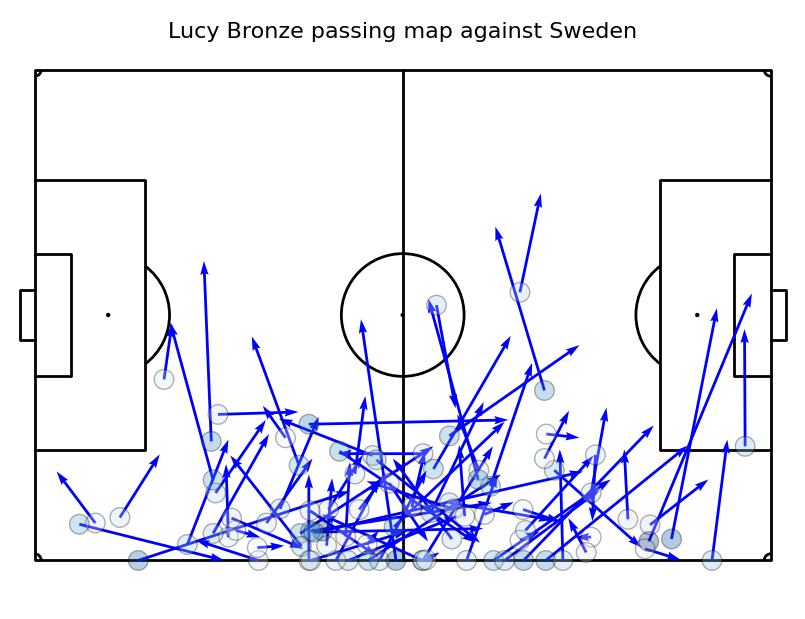

In [37]:
# Create the pitch
pitch = Pitch(line_color='black', goal_type='box', corner_arcs=True)
fig, ax = pitch.grid(figheight=6,grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# filter for Lucy Bronze
lucy = (passes.query('player=="Lucy Bronze"')
#         .query('pass_type=="Throw-in"')
       )

# drawing on the pitch
pitch.arrows(lucy.x,lucy.y,lucy.x_f,lucy.y_f, ax=ax['pitch'], color='b', width=2)
pitch.scatter(lucy.x, lucy.y, ax=ax['pitch'], c=lucy.pass_length, s=200, cmap='Blues', alpha=0.3, edgecolor='k')

plt.suptitle('Lucy Bronze passing map against Sweden', fontsize=16)
plt.show()